In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics

import sklearn.preprocessing

import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab

import sklearn.mixture as mixture
import pyclustertend
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer

import random




In [50]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import pandas as pd

#Estadistica de Hokpins
movies_df =pd.read_csv('./movies.csv', encoding='latin1')
def hopkins_statistic(X): 
  sample = scale(X)
  n,d = X.shape
  
  m = int(0.1 * n) # 10% de la muestra
  neighbours = NearestNeighbors(n_neighbors=1).fit(X)
  rand_sample = np.random.random_sample(size=(m, d)) * (sample.max(axis=0) - sample.min(axis=0)) + sample.min(axis=0)
    
  u_dist, _ = neighbours.kneighbors(rand_sample, return_distance=True)
  u_dist_sum = np.sum(u_dist)
    
  w_dist, _ = neighbours.kneighbors(sample[np.random.choice(n, m, replace=False), :], return_distance=True)
  w_dist_sum = np.sum(w_dist)
    
  H = u_dist_sum / (u_dist_sum + w_dist_sum)
  return H

variables = movies_df[['budget', 'revenue', 'runtime',  "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].dropna()
variables['budget'] = variables['budget'].astype(str).str.replace(' ', '')

print(hopkins_statistic(variables.values))
  

0.6957046797836218


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


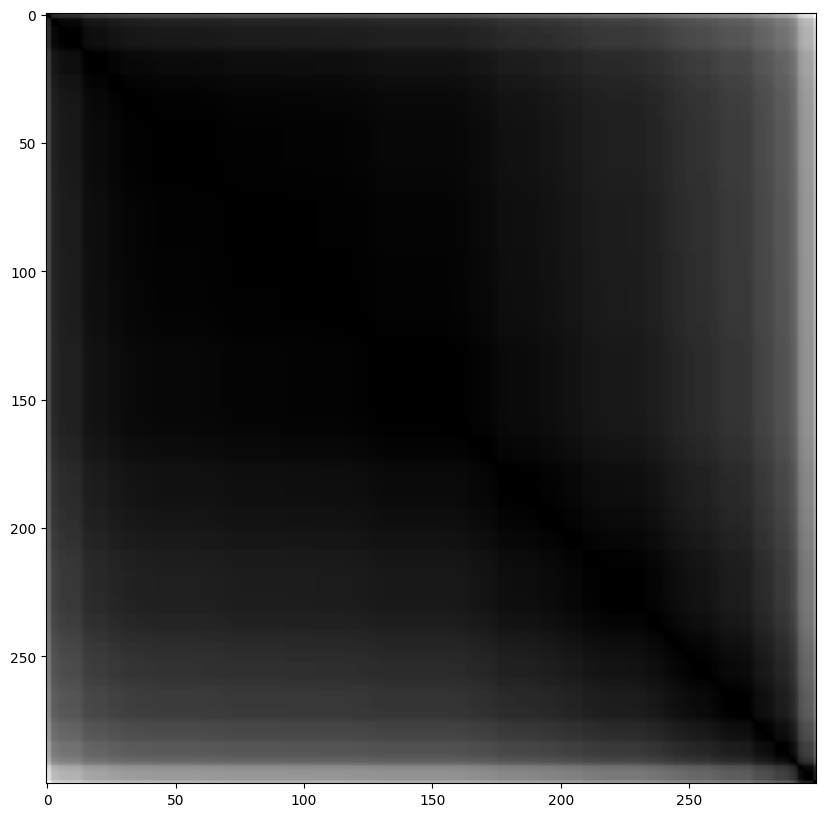

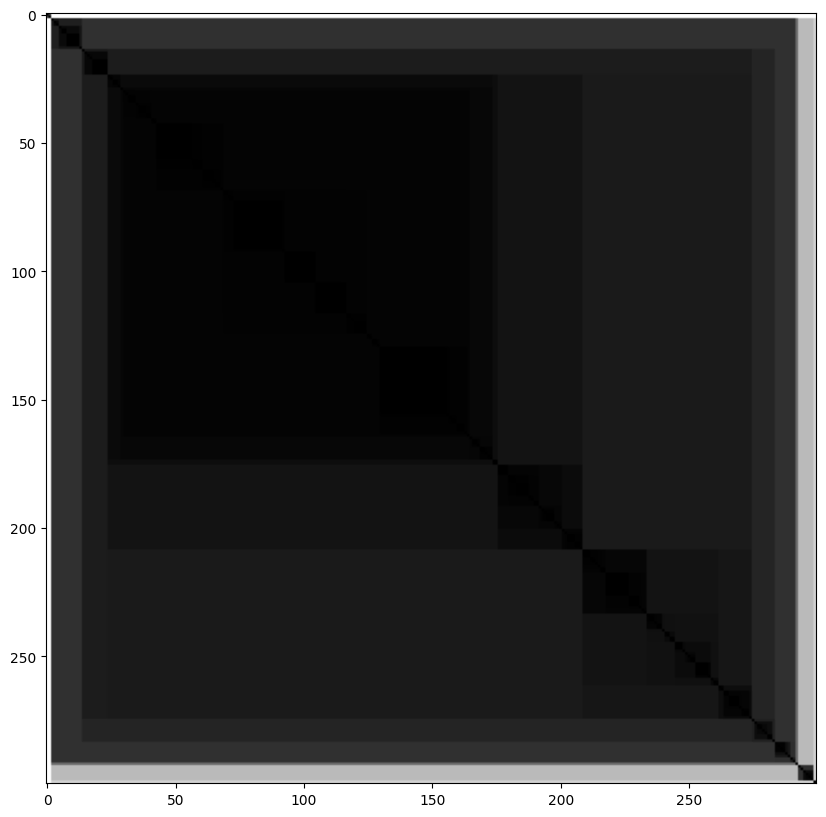

In [51]:
import pandas as pd
#import the packages
import pandas as pd # working with data
import numpy as np # working with arrays
from pyclustertend import vat
from pyclustertend import ivat
from sklearn.preprocessing import scale

movies_df =pd.read_csv('./movies.csv', encoding='latin1')
# movies_df[['budget', 'revenue', 'runtime']] = movies_df[['budget', 'revenue', 'runtime']].fillna(0)
movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]] = movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]].fillna(0)

# #drop rows with missing values
# movies_df = movies_df.dropna()

movies_df['budget'] = movies_df['budget'].astype(str).str.replace(' ', '').astype(float)

X = np.array(movies_df[["budget", "runtime", "revenue", "popularity", "voteAvg", "voteCount", "genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"]])

# X = np.array(movies_df[["runtime", "revenue"]])

# take random sample of 1000
X_sample = X[np.random.choice(X.shape[0], 30, replace=False), :]

X_scaled = scale(X_sample).flatten()

vat(X_scaled.reshape(-1, 1))

ivat(X_scaled.reshape(-1, 1))

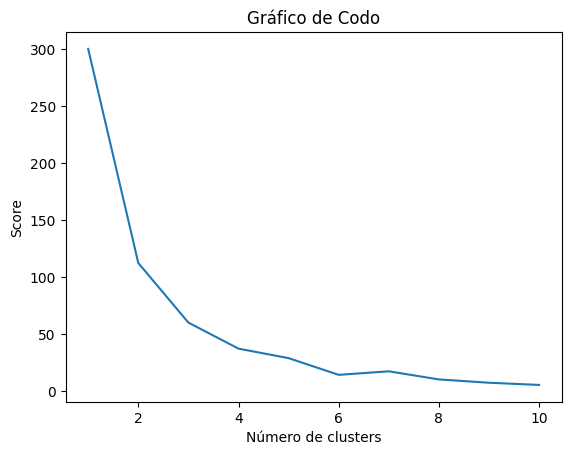

In [52]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X_scaled.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")

plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()

KMEAN

In [66]:
km = cluster.KMeans(n_clusters=3, max_iter=2000).fit(X)
print (km)

KMeans(max_iter=2000, n_clusters=3)


In [67]:
centroides = km.cluster_centers_
print(centroides)

[[9.67891640e+06 9.81161479e+01 1.72485575e+07 4.16299196e+01
  6.44463239e+00 7.60787551e+02 2.54138475e+00 3.10115020e+00
  1.78845286e+00 2.35140494e+03]
 [7.58407562e+07 1.14936722e+02 2.69888643e+08 1.10004876e+02
  6.71763485e+00 4.80481017e+03 2.98858921e+00 3.80705394e+00
  1.45435685e+00 6.36001037e+02]
 [1.58173810e+08 1.29690476e+02 9.18133310e+08 2.30477661e+02
  7.19107143e+00 1.21745060e+04 3.25595238e+00 3.23214286e+00
  1.47619048e+00 6.72738095e+01]]


In [68]:
especies = km.predict(X)

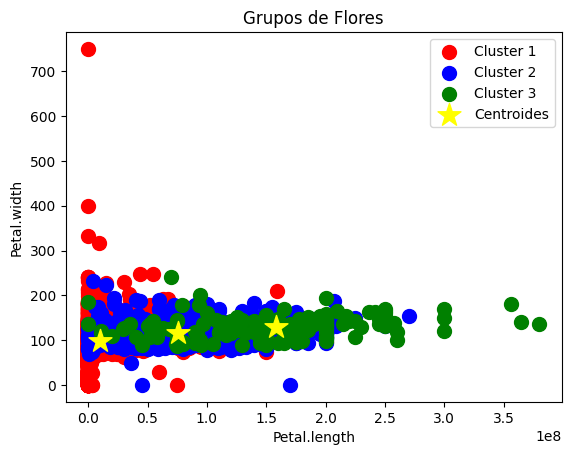

In [69]:
plt.scatter(X[especies == 0, 0], X[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[especies == 1, 0], X[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[especies == 2, 0], X[especies == 2, 1],s=100,c='green', label = "Cluster 3")
# plt.scatter(X[especies == 3, 0], X[especies == 3, 1],s=100,c='brown', label = "Cluster 4")
# plt.scatter(X[especies == 4, 0], X[especies == 4, 1],s=100,c='orange', label = "Cluster 5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Flores")
plt.xlabel("Petal.length")
plt.ylabel("Petal.width")
plt.legend()

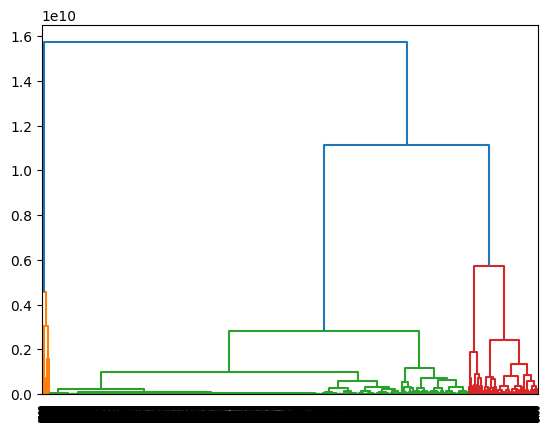

In [23]:
dendograma = sch.dendrogram(sch.linkage(X, method='ward'))